# Project: Telco Churn Rate

#### Find drivers for customer churn at Telco. Why are customers churning?


###### Hypothesis: Customer who are churning are ones with mail in check

###### Null: mail-in check does not have any relationship with customer churning

###### Alternative: Mail-in check customer have higher chance of churning

#### Construct a ML classification model that accurately predicts customer churn

## Import

In [103]:
import os 
import warnings
warnings.filterwarnings("ignore") #this will disregard any unnecessary warning Python may throw at me

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
#this was needed at the plot stage for visualize distribution
from sklearn.model_selection import train_test_split
#this was done later in the prep stage to split data
from sklearn.impute import SimpleImputer
#this was done at the end of the prep stage to import imputer

import seaborn as sns
#I imported seaborn at the beginning of the prep stage to graph out the relationship between two variables
from scipy import stats
#this was needed for the chisquare test in the beginning of the exploratory phase
from scipy.stats import chi2_contingency
#I imoprted this module to help with confirming my hypothesis 

from sklearn.metrics import confusion_matrix
#this was imported at the beginning of hte evaluation phase

from sklearn.metrics import confusion_matrix
#importing this at evaluation phase to emasure the model's performance 


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
#importing all these for modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
#importing for decision tree

from sklearn.ensemble import RandomForestClassifier
# ia m at the random tree part of the pipeline


from sklearn.neighbors import KNeighborsClassifier
#importing for kNN classifier

from sklearn.linear_model import LogisticRegression
#ending the project with logistic regression

## Acquire

Where and when you acquire your data.
How did I get teh data.
When did i get the data.
Size of data.
What does each observation represent?
What does each column represent?

#### I have acquire the JOINED telco data by exporting from MySQL Workbench. 


SELECT *
FROM customer_details
JOIN customer_contracts on customer_contracts.customer_id = customer_details.customer_id
JOIN customer_churn on customer_churn.customer_id = customer_contracts.customer_id
JOIN customer_payments on customer_payments.customer_id= customer_churn.customer_id
JOIN customer_signups on customer_signups.customer_id =customer_payments.customer_id
JOIN customer_subscriptions on customer_subscriptions.customer_id = customer_details.customer_id
JOIN internet_service_types on internet_service_types.internet_service_type_id = customer_subscriptions.internet_service_type_id
JOIN payment_types on payment_types.payment_type_id = customer_payments.payment_type_id
JOIN contract_types on contract_types.contract_type_id = customer_contracts.contract_type_id;

#### I uploaded telco data into Jupyter Notebook
#### and read it with the command below

In [2]:
#put telco file in the same repository
#importing telco .CSV file using acquisition method 
url = 'telco.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
#size of the data
df.shape

(7043, 25)

In [4]:
df.columns

Index(['Unnamed: 0', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'customer_id', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [5]:
df.columns.to_list()

['Unnamed: 0',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

## Prepare

List steps taken to clean your data here. In particular call out how you handle null values and outliers in detail. You must do this even if you do not do anything or do not encounter any. Anytime there is potential to make changes to the data you must be upfront about the changes you make or do not make.

In [6]:
#printing unique values for each of categorical variables using the for loop
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col} has {df[col].nunique()} unique values: {df[col].unique()}')


customer_id has 7043 unique values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
gender has 2 unique values: ['Female' 'Male']
partner has 2 unique values: ['Yes' 'No']
dependents has 2 unique values: ['Yes' 'No']
phone_service has 2 unique values: ['Yes' 'No']
multiple_lines has 3 unique values: ['No' 'Yes' 'No phone service']
online_security has 3 unique values: ['No' 'Yes' 'No internet service']
online_backup has 3 unique values: ['Yes' 'No' 'No internet service']
device_protection has 3 unique values: ['No' 'Yes' 'No internet service']
tech_support has 3 unique values: ['Yes' 'No' 'No internet service']
streaming_tv has 3 unique values: ['Yes' 'No' 'No internet service']
streaming_movies has 3 unique values: ['No' 'Yes' 'No internet service']
paperless_billing has 2 unique values: ['Yes' 'No']
total_charges has 6531 unique values: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
churn has 2 unique values: ['No' 'Yes']
contract_type h

In [7]:
df.isnull().sum()  #there are zero null so i do not need to consider dropping anything

Unnamed: 0                  0
payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [8]:
df = df.drop(columns=['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id'])

In [9]:
#turning the above into a function this will be used in exploration

def drop_columns(df):
    columns_to_drop = ['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id']
    df = df.drop(columns=[columns_to_drop])
    return df
#i have done this early in the pipeline to get rid of those pesky redundacy


In [10]:
df.dtypes # i have ensured the column dropped and list their data types

gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges             object
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

In [11]:
unique_values = df['total_charges'].unique()
print(unique_values)
#i dont see anything out of the norm but..

['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


# Come back to this to change the space in total_charges into a underscore

In [12]:
#note that the total_charges is read as an object
#this mean that some values could be Null, non-numeric, or Dollar sign, or a space
# we need to get rid of these

df['total_charges'].str.replace(',', '')
df['total_charges'].str.replace(' ', '0')
pd.to_numeric(df['total_charges'], errors='coerce')

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
7042    3707.60
Name: total_charges, Length: 7043, dtype: float64

In [13]:
def change_dtype(df):
    df.total_charges = df.total_charges.replace(' ', 0)
    df.total_charges = df.total_charges.astype(float)
    return df

In [14]:
change_dtype(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [15]:
# i need to identify columns with object incase i have to change it into integer for pandas during machine learning phase
df.select_dtypes(include='object').columns.to_list()

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [16]:
#i need to compute for the range of each numeric variables to understand Data Distribution and visualization
#i have identied three columns with numeric values
numeric_columns = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        numeric_columns.append(col)

print(numeric_columns)

['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']


In [17]:
#computing the range for each columns
df[['senior_citizen', 'tenure', 'monthly_charges']].describe().T
#below are the statistic description for each of the variables

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [19]:
df.describe()   #this is use to view summary stat for numeric columns

,senior_citizen,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


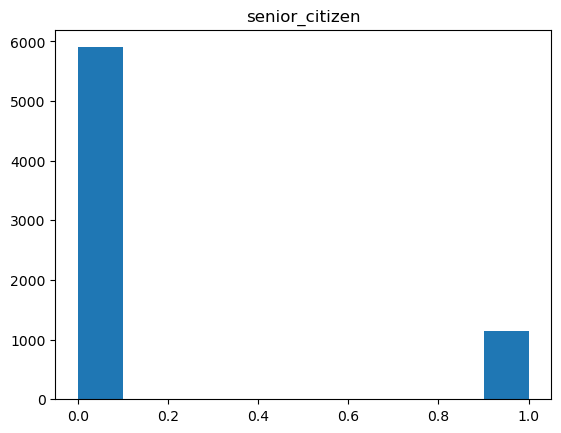

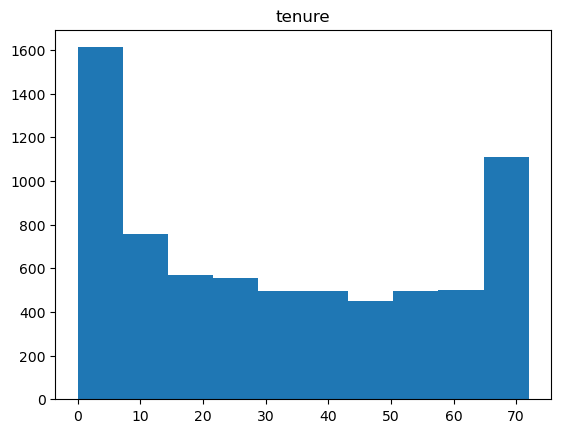

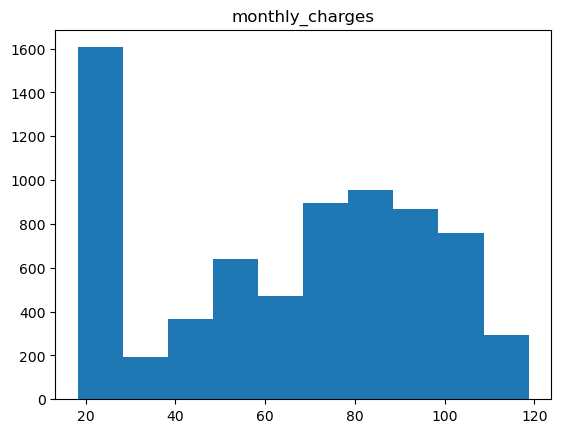

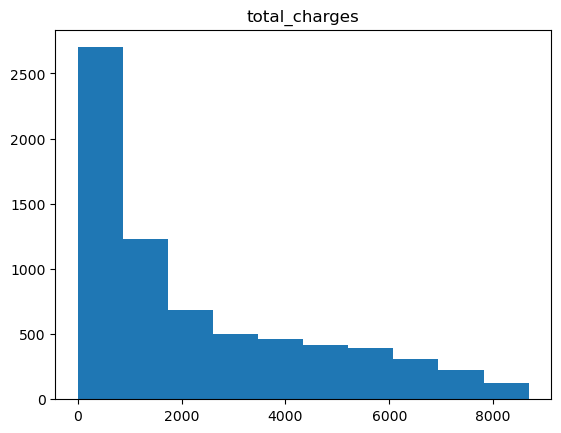

In [20]:
#this function is to plot all columns with numeric values
#since float64 and int64 are not object, i was able to use that to create a plot
num_cols = df.columns[[df[col].dtype != 'object' for col in df.columns]]

for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [21]:
# Use .describe with non object columns with the normalized value count 
# i did this to see the distribution of unique values
# and to understand the frequency and proportion of different values in the numerical columns

obj_cols = df.columns[[df[col].dtype != 'O' for col in df.columns]]  #'O' is for object
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')


0    5901
1    1142
Name: senior_citizen, dtype: int64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
----------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
----------------------
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: monthly_charges, Length: 1585, dtype: int64
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
20.00     0.006105
            ...   
116.55    0.000142
106.85    0.000142
68.55     0.000142
108.80    0.000142
67.85     0.000142
Name: monthly_charges, Length: 1585, dtype: float64
----------------------
0.

The normalized value counts show that proportion of value 0 is about 83.79%, and the value 1 is about 0.1621%

The tenure data shows 73 different value of months from 0 to 72.
the normalized value counts show proportion of each months in relation to its non-null values

there are 1585 unique values in monthly_charges column. this data show the proportion of the 1585 values relative to total number of non-null values



In [22]:
# Use .describe with object columns with the normalized value count 
# i did this to see the distribution of unique values
# and to understand the frequency and proportion of different values in the categorical columns

obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]  #'O' is for object
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
----------------------
No     3641
Yes    3402
Name: partner, dtype: int64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
----------------------
No     4933
Yes    2110
Name: dependents, dtype: int64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
----------------------
Yes    6361
No      682
Name: phone_service, dtype: int64
Yes    0.903166
No     0.096834
Name: phone_service, dtype: float64
----------------------
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
----------------------
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
No                     0.496663
Yes            

In this dataset I can see that gender has two values of male and female. pretty even out

more customers does not have dependents at 70%

about 90% have phone service with us

about 42 % have multiline and 48% with no multiline

about 49% does not have online security

about 43% does not have online backup

about 43% does not have device protection

about 39% does not have tv and 38% does

about 39% does not have streaming movies, and 38% does

about 59% have paperless billing and 40% does not

churn is abotu 26% and 73% not churn

majority have fiber optic

and majority have electronic check



## next step is to split the data




In [23]:
#i want 20% test, 80% train-validate
#of the 80% train_validate, i have 30% validate, and 70% train
seed = 42 #this is a random state (number generator) so anyone can take my code and produce the same result 
train, test = train_test_split(df, test_size=.2, random_state=seed, stratify=df.churn) 
#stratifying the churn will maintain the same class distribution in both training and test dataset
#after i run this code, i will have two separate datasets: train and test, subset of df. 


train, validate = train_test_split(train, test_size=.3, random_state=seed, stratify=train.churn)
#this code will further split the train subset into train and validate with 30% validate and 70% train

In [24]:
# after the split i want to validate my train so that my model perform well to unseen data
# validate will prevent overfitting, be able to experience different hyperparameter, 
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 20)
validate -> (1691, 20)
test -> (1409, 20)


the train set is used for training, the validation set help with tuning, and the test set assesses the model's final performance. 

the train set have a bigger shape compare the validate and test, and all subsets contain the same number of columns

# Impute missing values


I want to impute missing values to fill in the gaps with estimated or predicted values. 
I can impute using statistical measure, or a constant value.
I have to becareful not to impute values in a way that create bias in my data

In [25]:
train.info()  #this is the dataset after we have splitted our data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6377
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   object 
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   object 
 3   dependents             3943 non-null   object 
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   object 
 6   multiple_lines         3943 non-null   object 
 7   online_security        3943 non-null   object 
 8   online_backup          3943 non-null   object 
 9   device_protection      3943 non-null   object 
 10  tech_support           3943 non-null   object 
 11  streaming_tv           3943 non-null   object 
 12  streaming_movies       3943 non-null   object 
 13  paperless_billing      3943 non-null   object 
 14  monthly_charges        3943 non-null   float64
 15  t

In [26]:
#creating a SimpleImputer object to store impute variables, and the impute will replace missing values with a constant unknown
imputer = SimpleImputer(fill_value= 'unknown', strategy= 'constant')
#if i were to use the 'most_frequent' strategy, it would fill in any null values with the most dominant class value and that will introduce bias into the data
#by filling in unknown or missing value, i can prevent any assumptions about the the data

In [27]:
#fitting the imputer to the columns of train. 
imputer.fit(train[['churn']])

SimpleImputer(fill_value='unknown', strategy='constant')

In [28]:
# I will need to applyi the same impute to all the subsets of the data
train[['churn']] = imputer.transform(train[['churn']])

validate[['churn']] = imputer.transform(validate[['churn']])

test[['churn']] = imputer.transform(test[['churn']])


In [29]:
train.churn.value_counts(dropna=False)  #I should have 3943 total value counts in train subset

No     2897
Yes    1046
Name: churn, dtype: int64

In [30]:
#creating a function of impute to run through all the step above when i pass the train, validate, and test DataFrames as my argument
def impute_mode(train, validate, test):
    imputer = SimpleImputer(fill_value= 'unknown', strategy='constant')
    train[['churn']] = imputer.fit_transform(train[['churn']])
    validate[['churn']] = imputer.transform(validate[['churn']])
    test[['churn']] = imputer.transform(test[['churn']])
    return train, validate, test



# I should be making function  of clean data and split data already for preparation

# This is when I should test the function to make sure all data are still working properly

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3943 entries, 4604 to 6377
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 3943 non-null   object 
 1   senior_citizen         3943 non-null   int64  
 2   partner                3943 non-null   object 
 3   dependents             3943 non-null   object 
 4   tenure                 3943 non-null   int64  
 5   phone_service          3943 non-null   object 
 6   multiple_lines         3943 non-null   object 
 7   online_security        3943 non-null   object 
 8   online_backup          3943 non-null   object 
 9   device_protection      3943 non-null   object 
 10  tech_support           3943 non-null   object 
 11  streaming_tv           3943 non-null   object 
 12  streaming_movies       3943 non-null   object 
 13  paperless_billing      3943 non-null   object 
 14  monthly_charges        3943 non-null   float64
 15  t

# We are now at the exploratory data

My questions is 
I think that payment_type increase the chance of churn
Null: payment types has no relationship with churn
Alternative: Payment types decreases the chance of churn

In [32]:
train.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
4604,Male,0,No,No,6,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.65,109.30,No,Month-to-month,None,Mailed check
4051,Male,1,No,No,9,Yes,Yes,Yes,No,No,No,No,No,No,54.55,494.05,Yes,Month-to-month,DSL,Electronic check


In [33]:
train.isna().sum()   #making sure that no nulls are present

gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

### Splitting data into Train, Validate, Test

In [34]:


def train_validate_test_split(train, target='churn', seed=42):
    train_validate, test = train_test_split(train, test_size=0.2,
                                           random_state=seed,
                                           stratify=train[target])
    train, validate = train_test_split(train_validate, test_size = 0.3,
                                      random_state=seed,
                                      stratify=train_validate[target])
    return train, validate, test

train, validate, test = train_validate_test_split(train, target='churn', seed=42)


In [35]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(df, target='churn')
train.shape, validate.shape, test.shape


((3943, 20), (1691, 20), (1409, 20))

# Exploratory analysis

In [36]:
df



,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [37]:
df['payment_type'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

## payment_type to churn. Does customer who conveniently pay with electronic check more likely to stay?


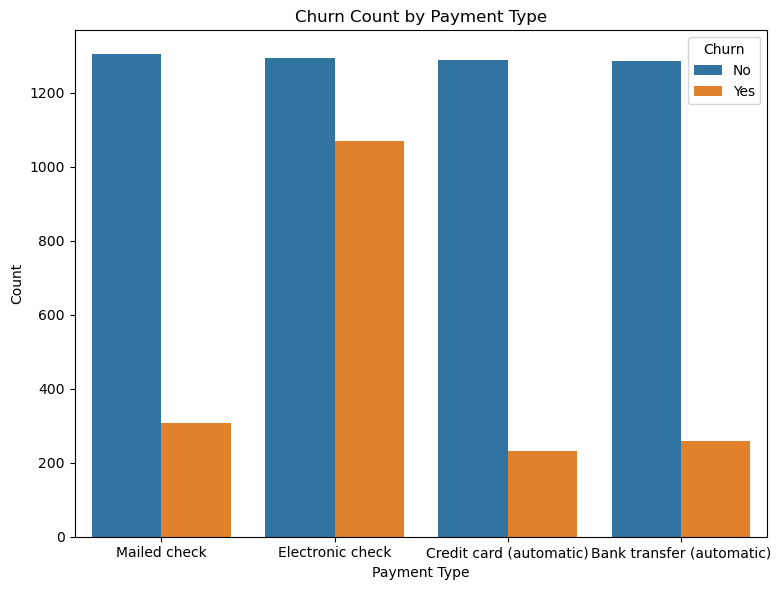

In [38]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payment_type', hue='churn')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Churn Count by Payment Type')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

electronic check are more likely to leave the company. but to be more certain of this statement, we have to run a hypothesis test to include Chi squared to compare proportion. 


In [39]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "payment Type and Churn are independent"
alternative_hypothesis = "there is a relationship between Payment Type and Churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.payment_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that payment Type and Churn are independent
Sufficient evidence to move forward understanding that there is a relationship between Payment Type and Churn


8.092521866989644e-83

## tech_support to churn. Does customer with tech support more likely to stay with the company?

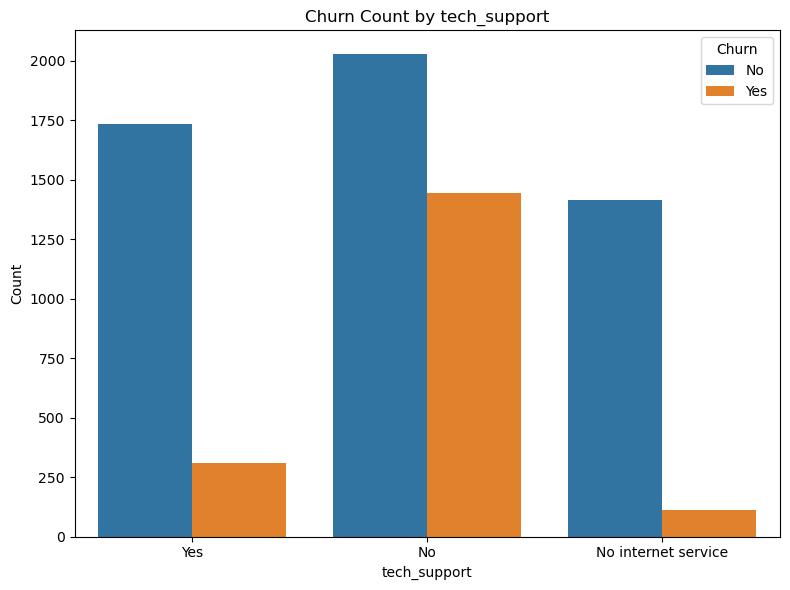

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='tech_support', hue='churn')
plt.xlabel('tech_support')
plt.ylabel('Count')
plt.title('Churn Count by tech_support')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

I can conclude that customer with no tech_support are more likely to leave

In [41]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Tech Support and Churn are independent"
alternative_hypothesis = "there is a relationship between Tech Support and Churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.tech_support)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that Tech Support and Churn are independent
Sufficient evidence to move forward understanding that there is a relationship between Tech Support and Churn


3.1517703803077457e-103

## contract type to churn. does shorter contract type keep more customer from leaving?

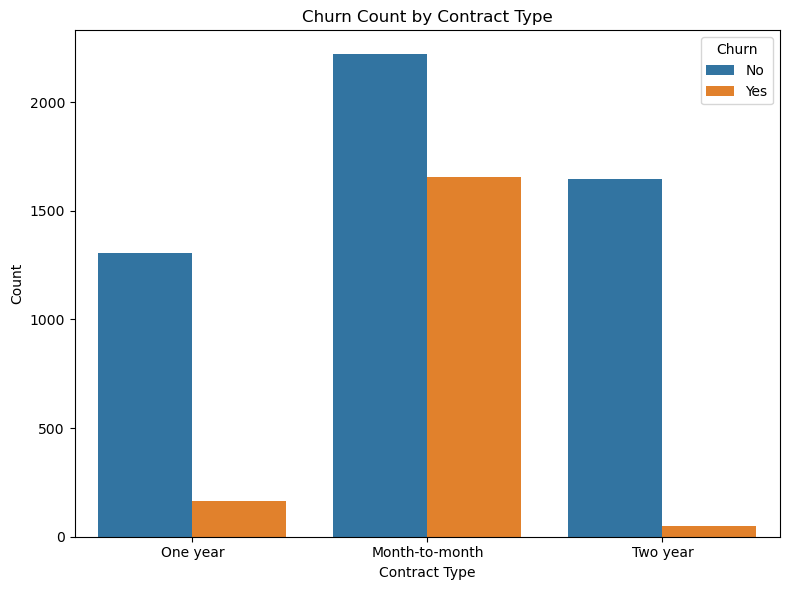

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='contract_type', hue='churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Churn Count by Contract Type')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

customer with monthly to month are more likely to churn

In [43]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "Contract Type and Churn are independent"
alternative_hypothesis = "there is a relationship between Contract Type and Churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.contract_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that Contract Type and Churn are independent
Sufficient evidence to move forward understanding that there is a relationship between Contract Type and Churn


3.464700523633984e-151

## senior_citizen to churn. Are senior citizen no longer need services?

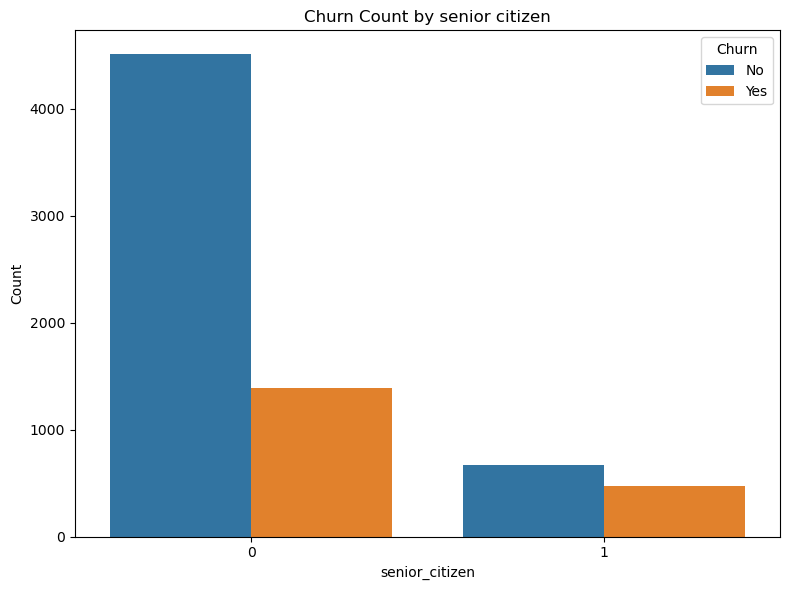

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='senior_citizen', hue='churn')
plt.xlabel('senior_citizen')
plt.ylabel('Count')
plt.title('Churn Count by senior citizen')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

there are more senior who will stay with the company, but senior citizen are more likely to churn 

In [45]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "senior_citizen and Churn are independent"
alternative_hypothesis = "there is a relationship between senior_citizen and Churn"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(train.churn, train.senior_citizen)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")
p


Reject the null hypothesis that senior_citizen and Churn are independent
Sufficient evidence to move forward understanding that there is a relationship between senior_citizen and Churn


8.66874699390739e-22

The extremely small p-value indicates strong evidence against the null hypothesis.
### Take away:
#### customers who pay using electronic check are more likely to leave the company
#### Customer with tech support services will stay at the company
#### Customer who are only on a month-to-month account for majority of the population but have more option to leave. 
#### customer with two years contract will stay at the company
#### Senior citizens have a higher chance of leaving compare to younger customer

### I do have more questions with more than 2 variables : 

churn are less with lower month and total charges

In [46]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


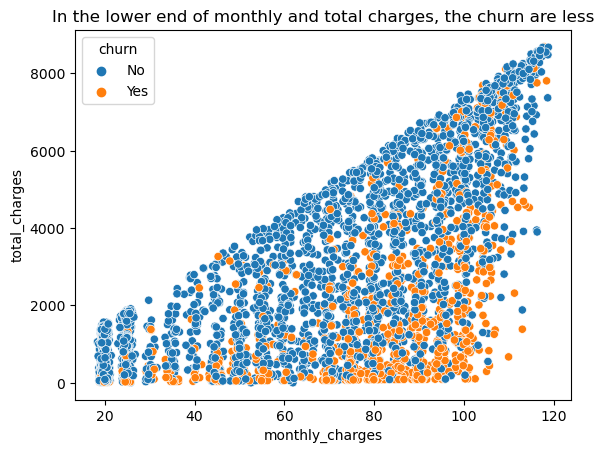

In [47]:
# the churn are lesser at lower month and total charges
plt.title("In the lower end of monthly and total charges, the churn are less")
sns.scatterplot(x="monthly_charges", y="total_charges", data=train, hue="churn")
#charges_churn = train.churn.mean()  #commenting this out will result in no scary
#plt.axhline(charges_churn)
plt.show()

The churn are mostly concentrated at the 80-100. Therefore we can conclude that the lower the bill,the more likely customer will stay with the company. 

let's do another one, female are more likely to stay because they are responsible for hunting the next cheap service

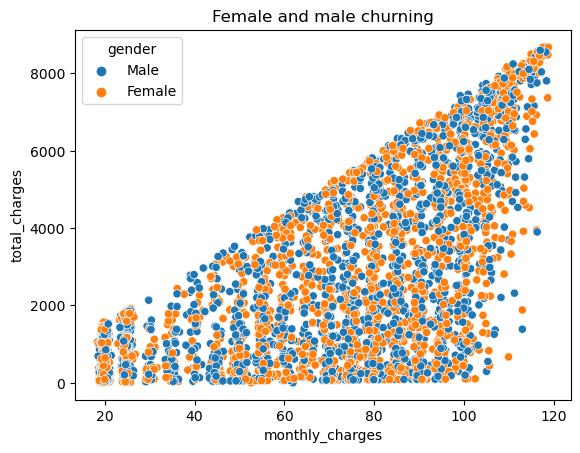

In [48]:
# the churn are lesser at lower month and total charges
plt.title("Female and male churning")
sns.scatterplot(x="monthly_charges", y="total_charges", data=train, hue="gender")
plt.show()

this graph show that female and male have the same patter of churning

# Evaluation phase

we are evaluating a classification model's performance 

In [49]:
# Confusion Matrix: cross tab of 2 catagorical ; contract_type and payment_type
pd.crosstab(df.gender, df.churn)


churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


There are 2549 True negatives, where we predict female will not churn

There are 2625 False Positive, where we predicted male will not churn

There are 939 False negative, where we predicted female will churn

There are 930 True positive, where we predicted male will churn

This confusion data shows a balance

# Eval to be continue

# Starting Modeling phase; train, validate, test

In [50]:
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.30,No,One year,DSL,Mailed check
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.40,No,Month-to-month,DSL,Mailed check
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.90,No,One year,DSL,Mailed check
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check
7040,Male,0,No,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [51]:
# Data Preprocessing: Convert categorical variables to one-hot encoded columns
df = pd.get_dummies(df, columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                                 'online_security', 'online_backup', 'device_protection', 'tech_support',
                                 'streaming_tv', 'streaming_movies', 'paperless_billing',
                                 'contract_type', 'internet_service_type', 'payment_type'])

In [55]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target='churn', seed=42):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [56]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='churn', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn


In [62]:
# Define features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42, max_depth=2)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Predictions on test data
y_pred = tree.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.7636621717530163
Confusion Matrix:
 [[844 192]
 [141 232]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.81      0.84      1036
         Yes       0.55      0.62      0.58       373

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.77      0.76      0.77      1409



In [63]:
tree

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'contract_type_Month-to-month <= 0.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]\nclass = No'),
 Text(0.25, 0.5, 'monthly_charges <= 93.675\ngini = 0.121\nsamples = 2539\nvalue = [2375, 164]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'gini = 0.072\nsamples = 1918\nvalue = [1846, 72]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'gini = 0.252\nsamples = 621\nvalue = [529, 92]\nclass = No'),
 Text(0.75, 0.5, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 3095\nvalue = [1763, 1332]\nclass = No'),
 Text(0.625, 0.16666666666666666, 'gini = 0.411\nsamples = 1391\nvalue = [989, 402]\nclass = No'),
 Text(0.875, 0.16666666666666666, 'gini = 0.496\nsamples = 1704\nvalue = [774, 930]\nclass = Yes')]

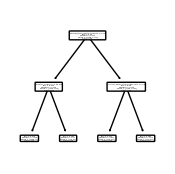

In [64]:
plt.figure(figsize=(2,2))
plot_tree(tree, feature_names=X_train.columns, class_names=tree.classes_, rounded=True)


# making prediction

In [65]:
y_pred = tree.predict(X_train)
y_pred[0:5]

array(['Yes', 'Yes', 'Yes', 'Yes', 'No'], dtype=object)

# estimate probability

In [66]:
y_pred_proba = tree.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.45422535, 0.54577465],
       [0.45422535, 0.54577465],
       [0.45422535, 0.54577465],
       [0.45422535, 0.54577465],
       [0.71099928, 0.28900072]])

# Evaluate Model

### compute the accuracy

In [68]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree.score(X_train, y_train)))


Accuracy of Decision Tree classifier on training set: 0.76


In [69]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

          No       0.86      0.81      0.83      4138
         Yes       0.55      0.62      0.58      1496

    accuracy                           0.76      5634
   macro avg       0.70      0.72      0.71      5634
weighted avg       0.77      0.76      0.77      5634



# evaluate model with validated dataset
# compute the accuracy when run on validate

In [70]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))


Accuracy of Decision Tree classifier on validate set: 0.77


In [71]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = tree.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))


              precision    recall  f1-score   support

          No       0.86      0.81      0.84      1242
         Yes       0.55      0.64      0.59       449

    accuracy                           0.77      1691
   macro avg       0.71      0.73      0.71      1691
weighted avg       0.78      0.77      0.77      1691



# Random Forest

In [77]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=42)
rf.fit(X_train, y_train)  #I fitted the train model to data

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=42)

# Feature importance 

In [82]:
print(rf.feature_importances_)

[1.58519412e-03 1.30130519e-01 2.56581549e-02 6.53557213e-02
 2.38270419e-05 3.72776404e-06 1.17271812e-03 8.63490993e-04
 2.28016875e-03 3.47160133e-03 5.29845403e-04 3.52318379e-04
 5.09105424e-04 1.48402381e-04 9.26461413e-04 8.48626209e-02
 2.20446466e-02 1.32656857e-02 3.29219075e-02 1.66465268e-02
 4.52540294e-03 1.68901800e-02 5.06056163e-03 1.99400988e-03
 1.02281260e-01 1.82192051e-02 2.13992326e-02 0.00000000e+00
 4.86078725e-03 7.19337800e-04 0.00000000e+00 1.00735690e-02
 5.80478631e-04 2.35836202e-03 2.98778956e-03 1.67816673e-01
 1.84922461e-02 4.95422777e-02 2.02745431e-02 5.56805218e-02
 2.15531035e-02 1.48800879e-03 5.70802333e-03 6.47417826e-02
 0.00000000e+00]


# make prediction and estimate probability

In [83]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

# Evaluate the model by compute the accuracy, create matrix and classification report

In [90]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))


Accuracy of random forest classifier on training set: 0.79


In [91]:
print(confusion_matrix(y_train, y_pred))


[[3977  161]
 [1029  467]]


In [92]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

          No       0.79      0.96      0.87      4138
         Yes       0.74      0.31      0.44      1496

    accuracy                           0.79      5634
   macro avg       0.77      0.64      0.65      5634
weighted avg       0.78      0.79      0.76      5634



# Validate Model by evaluate on out-of-sample data


In [93]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(tree.score(X_validate, y_validate)))


Accuracy of random forest classifier on test set: 0.77


# kNN algorithm by Train, Evaluate, validate and visualize model 

### Train model by create KNN Object, fit the model make prediction, and estimate probability

In [96]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred = knn.predict(X_train)
y_pred_prob = knn.predict_proba(X_train)

### Evaluate model by compute the accuracy, create a confusion matrix, and create a classification report

In [98]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))


Accuracy of KNN classifier on training set: 0.83


In [99]:
print(confusion_matrix(y_train, y_pred))


[[3816  322]
 [ 644  852]]


In [100]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

          No       0.86      0.92      0.89      4138
         Yes       0.73      0.57      0.64      1496

    accuracy                           0.83      5634
   macro avg       0.79      0.75      0.76      5634
weighted avg       0.82      0.83      0.82      5634



### Validate model by evalauting on Out-of-Sample data

In [101]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on test set: 0.82


### Visualize model 

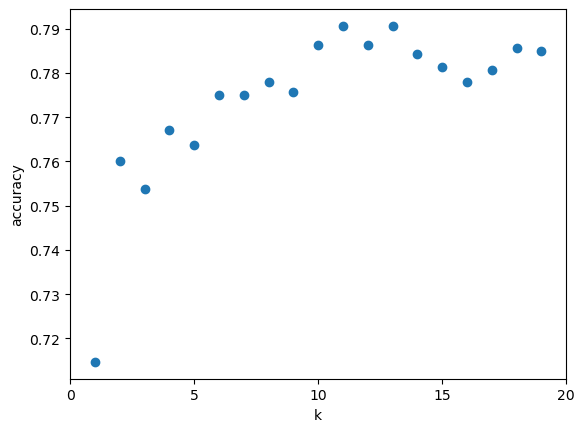

In [102]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


# Logistic Regression to predict discrete outcomes

I might need to remove attributes that are either unrelated tot he output variables or correlated to other attributes

### making the model  1 by create the object, fit the model, feature importance, make predictions, and estimate probability 

In [111]:
# from sklearn.linear_model import LogisticRegression
y_train_numeric = y_train.replace({'No': 0, 'Yes': 1})
logit = LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=42, intercept_scaling=1, solver='lbfgs')
logit.fit(X_train, y_train_numeric)



LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=42)

In [112]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)


Coefficient: 
 [[ 2.26607374e-01 -4.65763440e-02  2.90036417e-02  2.03656562e-04
   1.20933541e-01  1.72393933e-01  1.01194238e-01  1.92133236e-01
   2.20080194e-01  7.32472801e-02  3.82195898e-01 -8.88684239e-02
  -9.27849522e-02  3.82195898e-01  3.91652821e-03  3.44213055e-01
   1.47309671e-01 -1.98195252e-01  1.66905273e-01  1.47309671e-01
  -2.08874697e-02  2.22835648e-01  1.47309671e-01 -7.68178454e-02
   3.42080260e-01  1.47309671e-01 -1.96062457e-01  1.09630226e-01
   1.47309671e-01  3.63875771e-02  6.28646236e-02  1.47309671e-01
   8.31531795e-02  3.92921171e-02  2.54035357e-01  7.64884477e-01
  -2.75711626e-02 -4.43985841e-01  1.39644610e-01  6.37319325e-03
   1.47309671e-01 -5.77249131e-02 -9.57153754e-02  4.59298248e-01
  -1.25304854e-02]]
Intercept: 
 [0.29361193]


In [116]:
y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


# Evaluate model by compute the accuracy, create confusion matrix, and create classification report 

In [119]:
y_train_numeric = y_train.replace({'No': 0, 'Yes': 1})
accuracy = logit.score(X_train, y_train_numeric)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(accuracy))



Accuracy of Logistic Regression classifier on training set: 0.34


In [124]:
y_train_numeric = y_train.replace({'No': 0, 'Yes': 1})
confusion = confusion_matrix(y_train_numeric, y_pred)
print(confusion)


[[ 401 3737]
 [   3 1493]]


In [127]:

from sklearn.metrics import classification_report

y_train_numeric = y_train.replace({'No': 0, 'Yes': 1})
classification_rep = classification_report(y_train_numeric, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.99      0.10      0.18      4138
           1       0.29      1.00      0.44      1496

    accuracy                           0.34      5634
   macro avg       0.64      0.55      0.31      5634
weighted avg       0.80      0.34      0.25      5634



## Model 2

Make the Model by Create the Object, Fit the Model, Feature Importance, Make Prediction, and Estimate Probability

Evaluate Model by Compute the Accuracy, Create a confusion matrix, Create a classification report

Validate the Models by evluate on out-of-Sample data

Wrap up by testing and visualize the model

In [131]:


# Map 'No' to 0 and 'Yes' to 1 in y_train
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})

# Define class weights
class_weights = {0: 1, 1: 99}

# Create and fit the logistic regression model
logit2 = LogisticRegression(C=0.1, class_weight=class_weights, random_state=123, intercept_scaling=1, solver='lbfgs')
logit2.fit(X_train, y_train_numeric)


LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

In [132]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)


Coefficient: 
 [[ 2.24377157e-01 -4.63656997e-02  2.93504389e-02  1.96630224e-04
   1.19845185e-01  1.71248297e-01  1.01737315e-01  1.89356167e-01
   2.19901908e-01  7.11915739e-02  3.78688050e-01 -8.75945682e-02
  -9.13148275e-02  3.78688050e-01  3.72025931e-03  3.41887579e-01
   1.46230312e-01 -1.97024409e-01  1.65720903e-01  1.46230312e-01
  -2.08577332e-02  2.21417842e-01  1.46230312e-01 -7.65546725e-02
   3.40103482e-01  1.46230312e-01 -1.95240312e-01  1.09189830e-01
   1.46230312e-01  3.56733400e-02  6.28742394e-02  1.46230312e-01
   8.19889304e-02  3.87234497e-02  2.52370033e-01  7.58696561e-01
  -2.79321457e-02 -4.39670933e-01  1.38430776e-01  6.43239387e-03
   1.46230312e-01 -5.71018335e-02 -9.49893860e-02  4.54892305e-01
  -1.17076036e-02]]
Intercept: 
 [0.2938944]


In [134]:
y_pred2 = logit2.predict(X_train)
y_pred_proba2 = logit2.predict_proba(X_train)


In [136]:
# Map 'No' to 0 and 'Yes' to 1 in y_train
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})

# Calculate accuracy using the numeric labels
accuracy = logit2.score(X_train, y_train_numeric)
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(accuracy))



Accuracy of Logistic Regression classifier on training set: 0.34


In [139]:


# Map 'No' to 0 and 'Yes' to 1 in y_train
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})

# Calculate confusion matrix
cm = confusion_matrix(y_train_numeric, y_pred2)
print(cm)


[[ 401 3737]
 [   3 1493]]


In [143]:


# Map 0 to 'No' and 1 to 'Yes' in y_pred2
y_pred2_labels = pd.Series(y_pred2).map({0: 'No', 1: 'Yes'})

# Generate classification report
report = classification_report(y_train, y_pred2_labels)
print(report)




              precision    recall  f1-score   support

          No       0.99      0.10      0.18      4138
         Yes       0.29      1.00      0.44      1496

    accuracy                           0.34      5634
   macro avg       0.64      0.55      0.31      5634
weighted avg       0.80      0.34      0.25      5634



In [151]:

# Convert 'Yes' to 1 and 'No' to 0 in y_validate
y_validate_numeric = y_validate.apply(lambda label: 1 if label == 'Yes' else 0)

# Convert numeric predictions to string labels for model 1
y_pred1_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred1]

# Convert numeric predictions to string labels for model 2
y_pred2_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred2]

print("Model 1: solver = lbfgs, c = 1")

Model 1: solver = lbfgs, c = 1


In [152]:
# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate_numeric)))

Accuracy: 0.34


In [155]:

# Convert numeric true labels to string labels
y_validate_labels = ['Yes' if label == 1 else 'No' for label in y_validate_numeric]

# Convert numeric predictions to string labels for model 1
y_pred1_labels = ['Yes' if pred == 1 else 'No' for pred in y_pred1]

print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate_numeric)))

# confusion matrix of model 1
print(confusion_matrix(y_validate_labels, y_pred1_labels))

# classification report of model 1
print(classification_report(y_validate_labels, y_pred1_labels))


Model 1: solver = lbfgs, c = 1
Accuracy: 0.34
[[ 127 1115]
 [   2  447]]
              precision    recall  f1-score   support

          No       0.98      0.10      0.19      1242
         Yes       0.29      1.00      0.44       449

    accuracy                           0.34      1691
   macro avg       0.64      0.55      0.31      1691
weighted avg       0.80      0.34      0.25      1691

